# Feature performance

In [1]:
from random import gauss
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
sys.path.insert(2,'..')
import functions
import xgboost as xgb
from sklearn import preprocessing
import annualized_rv as arv
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor # Random Forest model
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting model
from sklearn.ensemble import AdaBoostRegressor # AdaBoost model
import sklearn.ensemble as ensemble

import tensorflow as tf
from tensorflow import keras

import DataProcess

In [2]:
# reads in the historic implied vol data calculated in the dailyaverageIV notebook

aaplHistIV = pd.read_pickle('historicImpliedVolData/aapl_mean_iv_2017_2022.pkl')
googHistIV = pd.read_pickle('historicImpliedVolData/goog_mean_iv_2017_2022.pkl')
msftHistIV = pd.read_pickle('historicImpliedVolData/msft_mean_iv_2017_2022.pkl')
ndxHistIV = pd.read_pickle('historicImpliedVolData/ndx_mean_iv_2017_2022.pkl')
spyHistIV = pd.read_pickle('historicImpliedVolData/spc_mean_iv_2017_2022.pkl')




In [3]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21) #preprocess spy

#reshape data for xgboost
def reshape2d(X_train,X_test):
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
    return X_train,X_test

X_train,X_test = reshape2d(X_train,X_test)

In [4]:
def modelandeval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MSE,RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test, y_pred)

    return RMSE, MAE, R2, MSE

In [5]:
#XGBoost model  see feature importance

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
history = model.fit(X_train, y_train)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

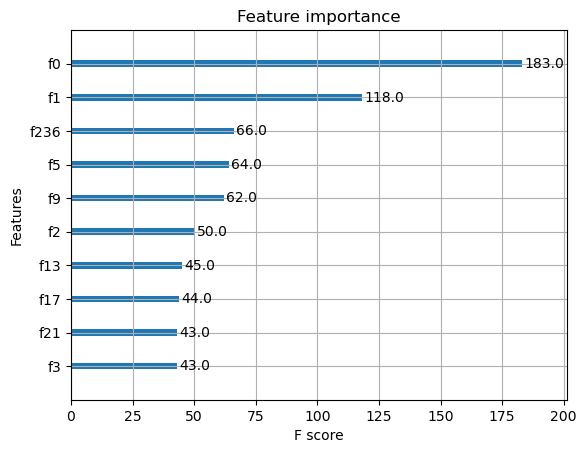

In [7]:
#plot top 10 features
xgb.plot_importance(model, max_num_features=10)

In [8]:
importance = model.feature_importances_

In [9]:
importance

array([6.95906056e-04, 1.55886693e-04, 1.33227301e-03, 9.53805458e-04,
       5.13205945e-04, 1.14561233e-04, 8.05620075e-05, 1.80051284e-04,
       2.55533168e-03, 2.33103769e-04, 6.01877036e-05, 9.44700965e-04,
       6.97400095e-03, 1.15963754e-04, 6.84211496e-04, 7.83790194e-04,
       5.75673301e-04, 2.44372000e-04, 1.19434961e-03, 1.66950587e-04,
       5.94809826e-04, 2.59631692e-04, 5.15236752e-04, 1.74183187e-05,
       2.66254588e-04, 6.05648442e-04, 1.21222685e-04, 9.97312382e-05,
       2.89734191e-04, 3.15035461e-04, 5.90748168e-05, 2.91193341e-04,
       1.21787458e-03, 4.96131310e-04, 4.38877178e-04, 4.96717694e-05,
       8.66417715e-04, 1.91345811e-04, 9.83651844e-04, 2.39468529e-04,
       5.09480899e-03, 2.65181414e-04, 3.92602338e-03, 1.70862347e-06,
       3.70827882e-04, 1.97560163e-04, 1.85705237e-02, 2.16146838e-03,
       2.05332958e-06, 1.51200235e-04, 6.45299405e-02, 7.80888367e-04,
       4.24089754e-04, 1.05566563e-04, 3.44574190e-04, 1.20115619e-04,
      